In [1]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
# Initial Parameters for all Derivatives
stock_price = 120.00         
strike_price = 100.00        
volatility = 0.20     
rate = 0.05           
dividend = 0 # Currently only works with non-dividend yielding stocks
N_days = 365            
M = 50000

T = (365/365)  


In [3]:
# Black & Scholes Analytic price of the option (call)
d1 = (np.log(stock_price/strike_price) + (rate - dividend + volatility**2 / 2) * T) / (volatility * np.sqrt(T))
d2 = d1 - volatility * np.sqrt(T)

call_price = stock_price * np.exp(-dividend * T) * norm.cdf(d1) - strike_price * np.exp(-rate * T)*norm.cdf(d2)
put_price = strike_price * np.exp(-rate * T) * norm.cdf(-d2) - stock_price * np.exp(-dividend * T)*norm.cdf(-d1)

print(f"Call Price: ${round(call_price,4)}; Put Price: ${round(put_price,4)}")


Call Price: $26.169; Put Price: $1.292


Text(0, 0.5, 'Stock price ($)')

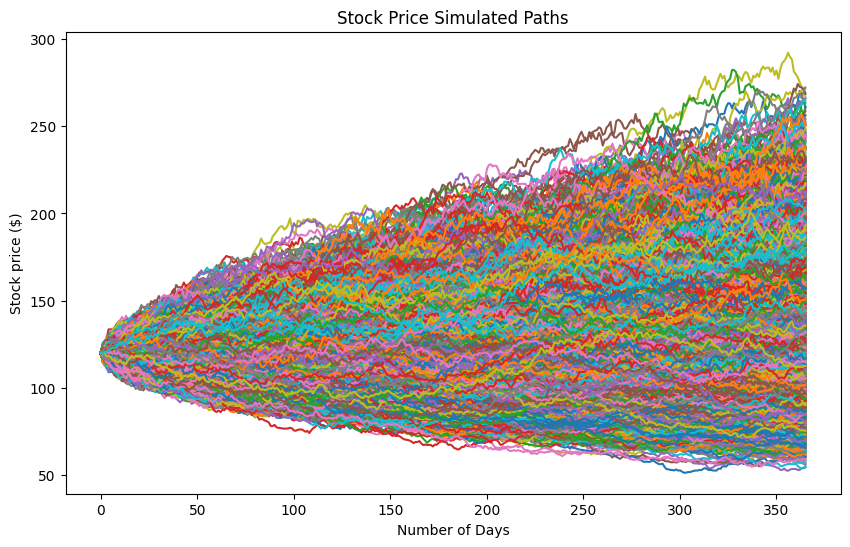

In [4]:

# Monte Carlo Brownian Motion (call)
seed = 6644
dt = T / N_days
sqrtdt = np.sqrt(dt)
    
price_path = np.zeros((N_days + 1, M))
    
price_path[0] = stock_price
standard_normal_array = np.random.RandomState(seed).standard_normal((N_days, M))

for i in range(1, N_days + 1):
    last_price =  price_path[i-1]
    price_path[i] = last_price + (rate * last_price * dt) + (last_price * volatility * sqrtdt * standard_normal_array[i-1])
    
    
plt.figure(figsize= (10,6))
plt.plot(price_path)
plt.title('Stock Price Simulated Paths')
plt.xlabel('Number of Days')
plt.ylabel('Stock price ($)')


In [5]:
final_prices = price_path[-1]

call_mean = (np.exp(-rate * T) * np.maximum(final_prices - strike_price, 0)).mean()
put_mean = (np.exp(-rate * T) * np.maximum(strike_price - final_prices, 0)).mean()

print(f"Call price is {np.round(call_mean, 4)}; Put price is {np.round(put_mean, 4)}")

Call price is 26.245; Put price is 1.3021


In [6]:
# Greeks
# Uses d1 and d2 from above.

gamma = norm.pdf(d1) / (stock_price * volatility * np.sqrt(T))

vega = stock_price * np.sqrt(T) * norm.pdf(d1)

delta_call = norm.cdf(d1)
delta_put = norm.cdf(d1) - 1

rho_call = strike_price * T * np.exp(-rate * T) * norm.cdf(d2)
rho_put = -strike_price * T * np.exp(-rate * T) * norm.cdf(-d2)

theta_call = -rate * strike_price * np.exp(-rate * T) * norm.cdf(d2) - (stock_price * norm.pdf(d1) * volatility) / (2 * np.sqrt(T))
theta_put = rate * strike_price * np.exp(-rate * T) * norm.cdf(-d2) - (stock_price * norm.pdf(d1) * volatility) / (2 * np.sqrt(T))

print(f'''
Gamma: {gamma}
Vega: {vega}
Delta (Call): {delta_call}
Delta (Put): {delta_put}
Rho (Call): {rho_call}
Rho (Put): {rho_put}
Theta (Call): {theta_call}
Theta (Put): {theta_put}
''')


Gamma: 0.007500245963538315
Vega: 21.600708374990347
Delta (Call): 0.8964550230770805
Delta (Put): -0.10354497692291953
Rho (Call): 81.40555882240236
Rho (Put): -13.717383627669058
Theta (Call): -6.2303487786191525
Theta (Put): -1.4742016561155817

